<a href="https://colab.research.google.com/github/emshashank/scikit_learn_practice/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install ucimlrepo


In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [6]:
car_evaluation.data.features

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/static/public/19/data.csv')
df.describe()


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [18]:
df.describe(include = 'all').T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


In [19]:
for col in df.columns:
  print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [21]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['buying']= oe.fit_transform(df[['buying']])
df['maint']= oe.fit_transform(df[['maint']])
df['doors']= oe.fit_transform(df[['doors']])
df['persons']= oe.fit_transform(df[['persons']])
df['lug_boot']= oe.fit_transform(df[['lug_boot']])
df['safety']= oe.fit_transform(df[['safety']])
df['class']= oe.fit_transform(df[['class']])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [11]:
x = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred1 = rfc.predict(x_test)
pred1

array([2., 2., 2., 2., 2., 0., 2., 0., 0., 0., 2., 2., 0., 2., 2., 0., 2.,
       2., 0., 2., 0., 0., 1., 2., 2., 2., 2., 2., 2., 2., 1., 0., 2., 0.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 0., 2., 2.,
       2., 2., 2., 0., 0., 0., 0., 1., 2., 2., 0., 2., 0., 0., 0., 2., 2.,
       2., 2., 1., 2., 2., 2., 0., 2., 2., 2., 3., 2., 0., 0., 2., 2., 2.,
       0., 2., 3., 0., 2., 0., 2., 2., 2., 2., 2., 1., 2., 1., 0., 2., 2.,
       2., 2., 2., 0., 2., 2., 2., 2., 0., 1., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 0., 0., 0., 0., 2.,
       2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 2., 0., 2., 1.,
       2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 1., 2., 2., 2., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       0., 2., 3., 2., 2.

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred1, y_test))

0.9788053949903661


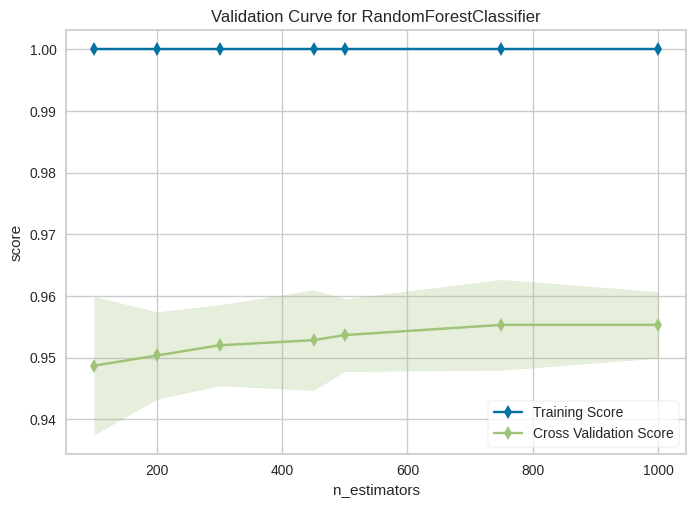

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  300,  450,  500,  750, 1000]),
                scoring='accuracy')


In [17]:
from yellowbrick.model_selection import validation_curve
num_est = [100,200,300,450, 500, 750, 1000]
print(validation_curve(RandomForestClassifier(), X=x_train, y=y_train, param_name="n_estimators", param_range = num_est, scoring="accuracy", cv=3))

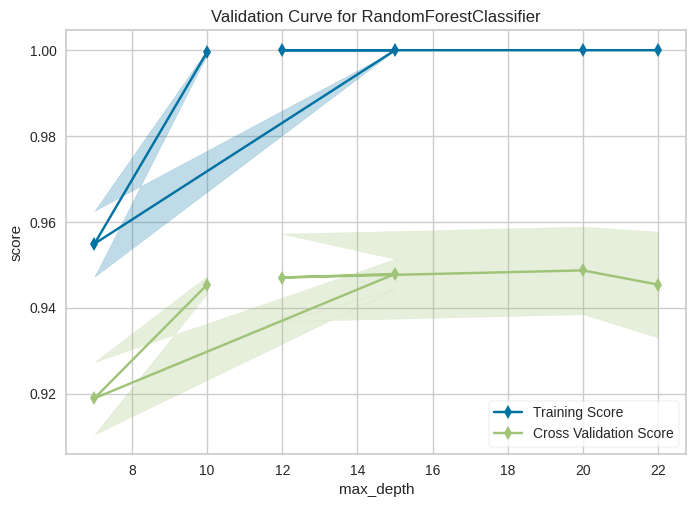

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [18]:
from yellowbrick.model_selection import validation_curve
#num_est = [100,200,300,450, 500, 750, 1000]
depth_vals = [10,7,15,12, 20, 22]
print(validation_curve(RandomForestClassifier(), X=x_train, y=y_train, param_name="max_depth", param_range = depth_vals, scoring="accuracy", cv=3))

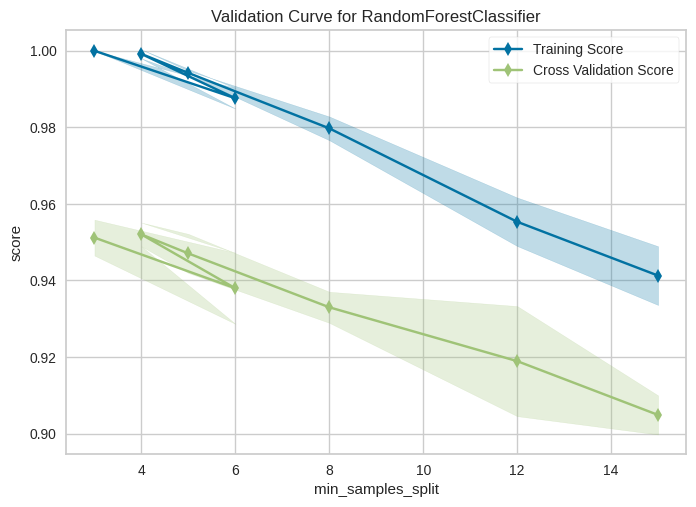

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [19]:
from yellowbrick.model_selection import validation_curve
#num_est = [100,200,300,450, 500, 750, 1000]
min_samples = [3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(), X=x_train, y=y_train, param_name="min_samples_split", param_range = min_samples, scoring="accuracy", cv=3))

In [21]:
clf2 = RandomForestClassifier(n_estimators=1000, min_samples_split=3, max_depth=15, random_state=0)
clf2.fit(x_train, y_train)
pred2= clf2.predict(x_test)
print(accuracy_score(pred2, y_test))


0.976878612716763


In [25]:
feature_scores = pd.Series(clf2.feature_importances_, index = x_train.columns).sort_values(ascending = False)
feature_scores

,0
safety,0.288486
persons,0.240167
buying,0.180694
maint,0.145541
lug_boot,0.081088
doors,0.064025


<Axes: xlabel='None', ylabel='None'>

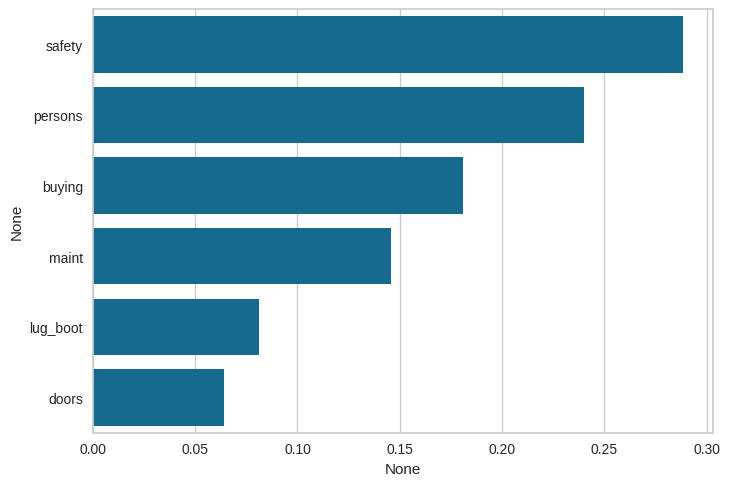

In [28]:
sns.barplot(x=feature_scores, y=feature_scores.index)

In [32]:
clf3 = RandomForestClassifier()

xn = df.drop(["doors", "lug_boot", "maint"], axis = 1)
yn = df['class']
x_trainn, x_testn, y_trainn, y_testn = train_test_split(xn, yn, test_size = 0.3)
clf3.fit(x_trainn, y_trainn)
pred3 = clf3.predict(x_testn)
pred3
print(accuracy_score(pred3, y_testn))

1.0
